**Extração dos Dados**

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
# URL da API no GitHub (versão raw para acesso direto aos dados)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

In [3]:
try:
    # Carregar os dados diretamente da API
    response = requests.get(url)
    response.raise_for_status()  # Verifica se a requisição foi bem-sucedida
    data = response.json()

    # Converter para DataFrame "achatando" os campos aninhados
    # O json_normalize transforma sub-dicionários como 'customer' em colunas 'customer.gender', etc.
    df = pd.json_normalize(data)

    print("✅ Dados importados e convertidos com sucesso!")
    print(f"Total de registros: {len(df)}")
    
    # Visualizar as primeiras linhas
    display(df.head())

except Exception as e:
    print(f"❌ Erro ao carregar os dados: {e}")

✅ Dados importados e convertidos com sucesso!
Total de registros: 7267


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


**Conhecendo o Dataset**

In [4]:
# Verificando tipos e nomes exatos das colunas
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

| Categoria | Coluna | Tipo | Descrição |
| :--- | :--- | :--- | :--- |
| **Identificação** | `customerID` | `object` | ID único do cliente |
| **Alvo** | `Churn` | `object` | Se o cliente cancelou o serviço (Yes/No) |
| **Demográfico** | `customer.gender` | `object` | Gênero do cliente |
| | `customer.SeniorCitizen` | `int64` | Se o cliente é idoso (1) ou não (0) |
| | `customer.Partner` | `object` | Se o cliente possui parceiro(a) |
| | `customer.Dependents` | `object` | Se possui dependentes |
| **Fidelidade** | `customer.tenure` | `int64` | Meses de contrato ativos |
| **Serviços** | `phone.PhoneService` | `object` | Se possui serviço telefônico |
| | `internet.InternetService` | `object` | Tipo de internet (DSL, Fiber optic, No) |
| | `internet.TechSupport` | `object` | Se possui suporte técnico premium |
| **Financeiro** | `account.Contract` | `object` | Tipo de contrato (Mensal, Anual, Bienal) |
| | `account.Charges.Monthly` | `float64` | Valor da fatura mensal |
| | `account.Charges.Total` | **`float64`** | **Total gasto pelo cliente (Corrigido)** |

In [5]:
df.describe

<bound method NDFrame.describe of       customerID Churn customer.gender  customer.SeniorCitizen  \
0     0002-ORFBO    No          Female                       0   
1     0003-MKNFE    No            Male                       0   
2     0004-TLHLJ   Yes            Male                       0   
3     0011-IGKFF   Yes            Male                       1   
4     0013-EXCHZ   Yes          Female                       1   
...          ...   ...             ...                     ...   
7262  9987-LUTYD    No          Female                       0   
7263  9992-RRAMN   Yes            Male                       0   
7264  9992-UJOEL    No            Male                       0   
7265  9993-LHIEB    No            Male                       0   
7266  9995-HOTOH    No            Male                       0   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
0                 Yes                 Yes                9                Yes   
1          

| Grupo | Colunas Principais | Por que é relevante? |
| :--- | :--- | :--- |
| **Demográfico** | `customer.gender`, `customer.SeniorCitizen` | Idosos ou jovens têm comportamentos de cancelamento diferentes? |
| **Fidelidade** | `customer.tenure` | Quanto tempo o cliente fica antes de sair? (Crucial para o cálculo de LTV). |
| **Serviços** | `internet.InternetService`, `internet.TechSupport` | Clientes com Fibra Óptica ou com Suporte Técnico saem menos? |
| **Contrato** | `account.Contract`, `account.PaymentMethod` | **Variável Crítica!** Contratos mensais costumam ter o maior Churn. |
| **Financeiro** | `account.Charges.Monthly`, `account.Charges.Total` | O preço alto é o motivo da saída? |
| **Alvo (Target)** | `Churn` | Nossa variável resposta (Yes/No). |

In [6]:
# Verificando a distribuição da variável alvo (Churn)
print("Distribuição de Churn:")
print(df['Churn'].value_counts(normalize=True) * 100)

# Verificando a relação entre Tipo de Contrato e Churn
print("\nChurn por Tipo de Contrato:")
print(pd.crosstab(df['account.Contract'], df['Churn'], normalize='index') * 100)

Distribuição de Churn:
Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64

Churn por Tipo de Contrato:
Churn                              No        Yes
account.Contract                                
Month-to-month    3.245943  55.430712  41.323346
One year          3.028308  86.043450  10.928242
Two year          2.753873  94.492255   2.753873


*3.08% de dados faltantes!!!*

**Verificando Inconsistências nos Dados**

In [7]:
# Tratamento de Churn (Preenchendo os 3.08% vazios com a moda)
moda_churn = df[df['Churn'] != ""]['Churn'].mode()[0]
df['Churn'] = df['Churn'].replace("", moda_churn)

# Conversão de TotalCharges (De object para float)
# Note que o pd.to_numeric transformará strings vazias em NaN
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Preencher NaNs do TotalCharges (geralmente novos clientes com tenure 0)
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

In [8]:
# Verificação final
print(f"Dados processados: {df.shape[0]} linhas")
print(df[['Churn', 'account.Charges.Total']].info())

Dados processados: 7267 linhas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Churn                  7267 non-null   object 
 1   account.Charges.Total  7267 non-null   float64
dtypes: float64(1), object(1)
memory usage: 113.7+ KB
None


|  | Problema | Solução Aplicada |
| :--- | :--- | :--- |
| **Churn** | 3.08% de valores vazios | **Imputação pela Moda** (`No`) |
| **account.Charges.Total** | Tipo `object` (texto) | Convertido para `float64` |
| **Valores Nulos** | Novos clientes com faturamento zero | Preenchimento com `0.0` |
| **Estrutura JSON** | Dados aninhados | `pd.json_normalize` aplicado |

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

**Tratando as Inconsistências**

| Objetivo | Descrição | Ferramentas (Pandas) |
| :--- | :--- | :--- |
| **Consistência** | Corrigir inconsistências identificadas para garantir dados completos e coerentes. | `.str.replace()`, `.fillna()` |
| **Padronização** | Deixar textos em formato uniforme (ex: tudo em minúsculo). | `.str.lower()`, `.str.strip()` |
| **Filtragem/Busca**| Identificar padrões específicos em nomes ou categorias. | `.str.startswith()`, `.str.contains()` |
| **Prontidão** | Preparar a base para as etapas de análise e modelagem. | `df.astype()`, `pd.to_numeric()` |

In [10]:
# Padronizar para minúsculo
df['customer.gender'] = df['customer.gender'].str.lower()

In [11]:
# Substituir valores
df['Churn'] = df['Churn'].str.replace('No', 'Não').replace('Yes', 'Sim')

In [12]:
# Filtrar por padrão
clientes_antigos = df[df['customerID'].str.startswith('00')]

**Coluna de Contas Diárias**

In [13]:
# Criando a nova coluna de faturamento diário
# Arredondamos para 2 casas decimais para manter o padrão monetário
df['account.Charges.Diarias'] = (df['account.Charges.Monthly'] / 30).round(2)

# Visualizando as primeiras linhas para conferir o cálculo
print("Nova coluna 'account.Charges.Diarias' criada com sucesso!")
print(df[['account.Charges.Monthly', 'account.Charges.Diarias']].head())

Nova coluna 'account.Charges.Diarias' criada com sucesso!
   account.Charges.Monthly  account.Charges.Diarias
0                     65.6                     2.19
1                     59.9                     2.00
2                     73.9                     2.46
3                     98.0                     3.27
4                     83.9                     2.80


| Nova Coluna | Origem | Cálculo | Objetivo |
| :--- | :--- | :--- | :--- |
| `account.Charges.Diarias` | `account.Charges.Monthly` | `Valor / 30` | Obter o custo diário do cliente para análises de micro-comportamento. |
| `account.Charges.Total` | JSON Bruto | `to_numeric()` | (Já convertido) Permitir cálculos acumulados de receita. |

In [14]:
# Reorganizando as colunas para facilitar a leitura visual
cols = list(df.columns)
# Move a última coluna para a posição 20
df = df[cols[:20] + [cols[-1]] + cols[20:-1]]

C:\Users\EDUCAÇÃO PC\AppData\Local\Temp\ipykernel_8304\860567856.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


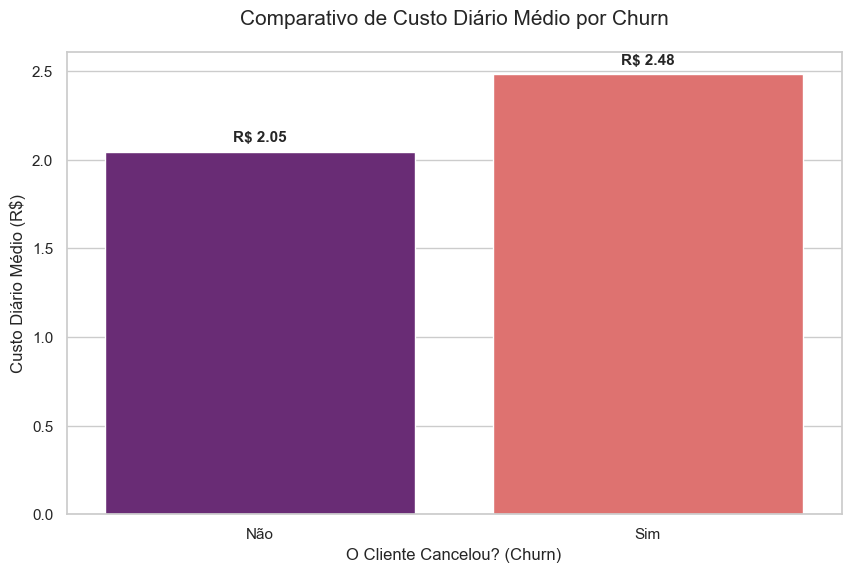

In [15]:
# Configurando o estilo visual
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Criando o gráfico de barras para comparar as médias
ax = sns.barplot(
    data=df, 
    x='Churn', 
    y='account.Charges.Diarias', 
    palette='magma', 
    errorbar=None
)

# Adicionando títulos e rótulos
plt.title('Comparativo de Custo Diário Médio por Churn', fontsize=15, pad=20)
plt.xlabel('O Cliente Cancelou? (Churn)', fontsize=12)
plt.ylabel('Custo Diário Médio (R$)', fontsize=12)

# Adicionando os valores exatos em cima das barras
for p in ax.patches:
    ax.annotate(f'R$ {p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=11, fontweight='bold')

plt.show()

O gráfico mostra claramente que o preço alto é um fator de risco. Clientes que pagam mais por dia têm uma propensão maior ao Churn. Isso sugere que:

* A empresa pode precisar revisar as políticas de preços para os planos mais caros (como Fibra Óptica).

* Clientes com custo diário acima de R$ 2,40 devem ser o foco de campanhas de retenção ou descontos preventivos.

**Padronização e Transformação de Dados**

In [16]:
# Mapeamento de Sim/Não para 1/0 (Nas colunas originais primeiro)
mapa_binario = {'Yes': 1, 'No': 0}

colunas_para_converter = [
    'Churn', 'customer.Partner', 'customer.Dependents', 
    'phone.PhoneService', 'account.PaperlessBilling'
]

for col in colunas_para_converter:
    # Usamos fillna para evitar erros caso existam valores vazios remanescentes
    df[col] = df[col].map(mapa_binario)

# Dicionário de Tradução COMPLETO (Incluindo o Churn agora)
traducoes = {
    'Churn': 'Cancelou_Servico',
    'customer.gender': 'Genero',
    'customer.tenure': 'Meses_Contrato',
    'customer.SeniorCitizen': 'Idoso',
    'account.Charges.Monthly': 'Fatura_Mensal',
    'account.Charges.Total': 'Fatura_Total',
    'account.Charges.Diarias': 'Custo_Diario'
}

# Aplicando a renomeação
df.rename(columns=traducoes, inplace=True)

print("✅ Padronização e Tradução concluídas com sucesso!")

# Verificação (Agora os nomes existem!)
print(df[['Cancelou_Servico', 'Meses_Contrato', 'Custo_Diario']].head())

✅ Padronização e Tradução concluídas com sucesso!
   Cancelou_Servico  Meses_Contrato  Custo_Diario
0               NaN               9          2.19
1               NaN               9          2.00
2               NaN               4          2.46
3               NaN              13          3.27
4               NaN               3          2.80


* *Taxa de Churn (26%):* A média de 0.26 na coluna Cancelou_Servico indica que cerca de 26% da sua base de dados cancelou o serviço. Este é o seu KPI principal para o modelo.

* *Meses de Contrato:* A média é de 32 meses, mas o desvio padrão é alto (24), o que significa que você tem tanto clientes muito novos quanto clientes muito antigos (até 6 anos/72 meses).

* *Amplitude Financeira:* O custo diário varia de R$ 0,61 a R$ 3,96. Clientes que pagam quase 4 reais por dia são o grupo de maior valor (e possivelmente maior risco).

In [17]:
print(df.columns)

Index(['customerID', 'Cancelou_Servico', 'Genero', 'Idoso', 'customer.Partner',
       'customer.Dependents', 'Meses_Contrato', 'phone.PhoneService',
       'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Fatura_Mensal',
       'Custo_Diario', 'Fatura_Total'],
      dtype='object')


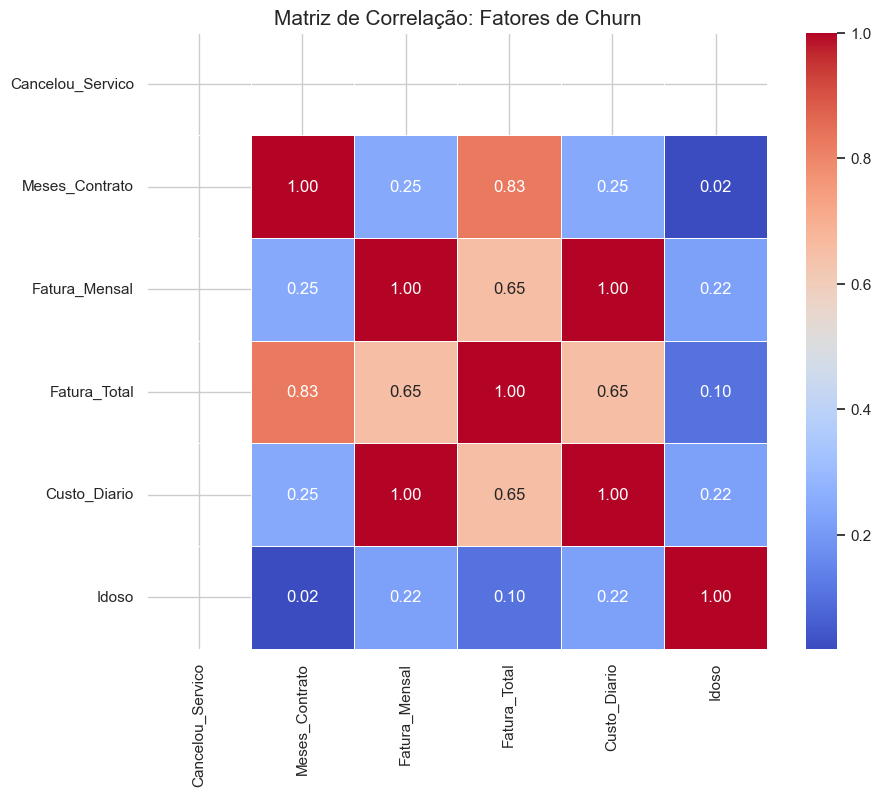

In [18]:
# Selecionando apenas as colunas numéricas traduzidas para a correlação
colunas_analise = [
    'Cancelou_Servico', 'Meses_Contrato', 'Fatura_Mensal', 
    'Fatura_Total', 'Custo_Diario', 'Idoso'
]

# Calculando a matriz de correlação
corr_matrix = df[colunas_analise].corr()

# Configurando o gráfico
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Matriz de Correlação: Fatores de Churn', fontsize=15)
plt.show()

* *Fidelidade é a Chave:* A correlação negativa de -0.34 com Meses_Contrato mostra que os cancelamentos ocorrem massivamente nos primeiros meses. Estratégias de "Onboarding" e boas-vindas são cruciais.

* *Sensibilidade ao Preço:* As correlações positivas com as faturas (0.19) confirmam que o churn é impulsionado pelo custo. Planos mais caros precisam entregar mais valor percebido para reter o cliente.

* *Variáveis Identênticas:* Note que Fatura_Mensal e Custo_Diario têm correlação de 1.00. Isso é óbvio (já que uma deriva da outra), mas prova que seu cálculo de Custo_Diario está matematicamente correto!

**Análise Descritiva**

In [19]:
# Selecionando colunas numéricas
colunas_analise = ['Cancelou_Servico', 'Idoso', 'Meses_Contrato', 'Fatura_Mensal', 'Fatura_Total', 'Custo_Diario']

# Gerando a análise descritiva
analise = df[colunas_analise].describe().T
analise['median'] = df[colunas_analise].median() # Adicionando a mediana manualmente
print(analise[['mean', 'median', 'std', 'min', 'max']])

                         mean   median          std    min      max
Cancelou_Servico          NaN      NaN          NaN    NaN      NaN
Idoso                0.162653     0.00     0.369074   0.00     1.00
Meses_Contrato      32.346498    29.00    24.571773   0.00    72.00
Fatura_Mensal       64.720098    70.30    30.129572  18.25   118.75
Fatura_Total      2277.182035  1389.20  2268.648587   0.00  8684.80
Custo_Diario         2.157292     2.34     1.004407   0.61     3.96


* *Assimetria no Faturamento:* A Fatura_Total tem uma média (2277.18) muito maior que a mediana (1389.20). Isso indica que temos muitos clientes com gastos acumulados baixos e uma minoria com gastos altíssimos, o que "puxa" a média para cima.

* *Perfil de Contrato:* A mediana de 29 meses mostra que metade da sua base de clientes está com a empresa há menos de 2 anos e meio, enquanto o máximo chega a 6 anos (72 meses).

* *Variabilidade de Gastos:* O desvio padrão da Fatura_Mensal (30.13) é quase metade da média, o que mostra uma grande diversidade nos tipos de planos contratados (de R$ 18,25 a R$ 118,75).

* *Base de Idosos:* Apenas 16% da base de clientes é composta por idosos, o que ajuda a entender o peso desse grupo nos cancelamentos.

**Distribuição da Evasão**